# Saiket System
## Task 3 : Customer Segmentation

###Description:
#### Segment customers based on tenure, monthly charges, and contract type. Analyze churn rates within these segments. Identify high-value customers who are at risk of churning and might need special attention.

In [25]:
# Importing Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Load dataset
df = pd.read_csv("/content/Telco_Customer_Churn_Dataset.csv")

In [27]:
# Fix TotalCharges formatting
df["TotalCharges"] = df["TotalCharges"].replace(" ", pd.NA)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [28]:
# Fill missing values
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [29]:
# 1. Create Segments

# Tenure segments
df["TenureSegment"] = pd.cut(
    df["tenure"],
    bins=[0, 12, 24, 48, 72],
    labels=["0-1 Year", "1-2 Years", "2-4 Years", "4-6 Years"]
)

# Monthly charges segments
df["ChargesSegment"] = pd.cut(
    df["MonthlyCharges"],
    bins=[0, 35, 70, 100, 150],
    labels=["Low", "Medium", "High", "Very High"]
)

# Contract type is already a segment by itself
# Contract: Month-to-month, One year, Two year

/tmp/ipython-input-2686577029.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby("TenureSegment")["Churn"].value_counts(normalize=True).unstack()



Churn Rate by Tenure Segment:
 Churn                No       Yes
TenureSegment                    
0-1 Year       0.523218  0.476782
1-2 Years      0.712891  0.287109
2-4 Years      0.796110  0.203890
4-6 Years      0.904868  0.095132


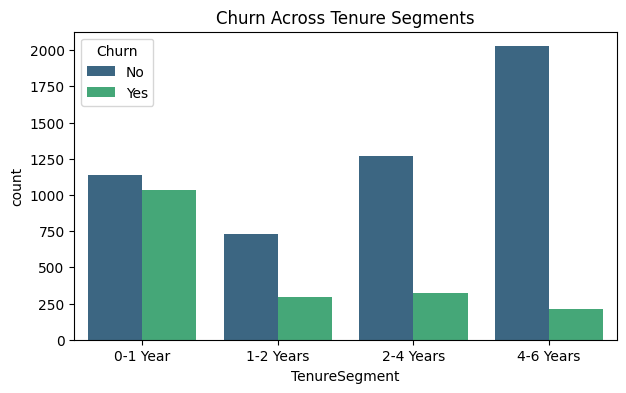

In [30]:
# 2. Churn Rate by Tenure Segment

tenure_churn = df.groupby("TenureSegment")["Churn"].value_counts(normalize=True).unstack()
print("\nChurn Rate by Tenure Segment:\n", tenure_churn)

plt.figure(figsize=(7,4))
sns.countplot(data=df, x="TenureSegment", hue="Churn", palette="viridis")
plt.title("Churn Across Tenure Segments")
plt.show()

/tmp/ipython-input-3013814845.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  charges_churn = df.groupby("ChargesSegment")["Churn"].value_counts(normalize=True).unstack()



Churn Rate by Monthly Charges Segment:
 Churn                 No       Yes
ChargesSegment                    
Low             0.891066  0.108934
Medium          0.760580  0.239420
High            0.621783  0.378217
Very High       0.719512  0.280488


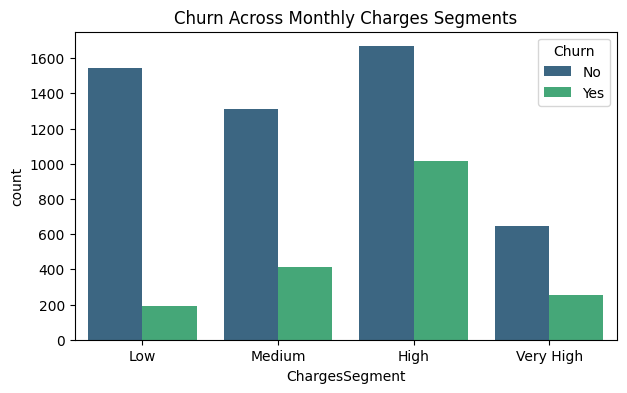

In [31]:
# 3. Churn Rate by Monthly Charges Segment

charges_churn = df.groupby("ChargesSegment")["Churn"].value_counts(normalize=True).unstack()
print("\nChurn Rate by Monthly Charges Segment:\n", charges_churn)

plt.figure(figsize=(7,4))
sns.countplot(data=df, x="ChargesSegment", hue="Churn", palette="viridis")
plt.title("Churn Across Monthly Charges Segments")
plt.show()


Churn Rate by Contract Type:
 Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


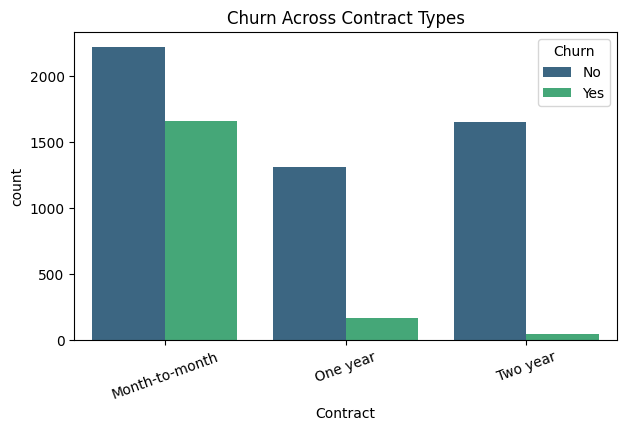

In [32]:
# 4. Churn Rate by Contract Type

contract_churn = df.groupby("Contract")["Churn"].value_counts(normalize=True).unstack()
print("\nChurn Rate by Contract Type:\n", contract_churn)

plt.figure(figsize=(7,4))
sns.countplot(data=df, x="Contract", hue="Churn", palette="viridis")
plt.title("Churn Across Contract Types")
plt.xticks(rotation=20)
plt.show()

In [33]:
# 5. Identify High-Value At-Risk Customers

# High value = High or Very High monthly charges
# At risk = Churn = Yes

high_value_risk = df[
    (df["ChargesSegment"].isin(["High", "Very High"])) & (df["Churn"] == "Yes")
]

print("\nHigh-Value Customers at Risk:\n", high_value_risk[["customerID", "MonthlyCharges", "Contract", "tenure"]].head())

print("\nTotal High-Value At-Risk Customers:", len(high_value_risk))



High-Value Customers at Risk:
     customerID  MonthlyCharges        Contract  tenure
4   9237-HQITU           70.70  Month-to-month       2
5   9305-CDSKC           99.65  Month-to-month       8
8   7892-POOKP          104.80  Month-to-month      28
13  0280-XJGEX          103.70  Month-to-month      49
26  6467-CHFZW           99.35  Month-to-month      47

Total High-Value At-Risk Customers: 1267
